####Problem Statement
XYZ Co's 2014 -2018 sales data to identify key revenue and profit drivers across products ,channels,and regions, uncover seasonal trends  and outliers ,and align performance against budgets . Use these insights to optimize pricing ,promotions and market expansion for sustainable growth and reduced concentration risk

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sheets=pd.read_excel('/content/Regional Sales Dataset.xlsx',sheet_name=None)

In [ ]:
#assigning dataframes to each sheet
df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_products=sheets['Products']
df_regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_budgets=sheets['2017 Budgets']

In [ ]:
df_sales.head(10)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270
5,SO - 0010394,2014-01-01,138,Export,USD,NXH382,626,23,11,5219.3,57412.3,4332.019
6,SO - 0008865,2014-01-01,53,Wholesale,USD,GUT930,540,1,7,2874.3,20120.1,1667.094
7,SO - 0009909,2014-01-01,45,Wholesale,USD,AXW291,156,25,10,1045.2,10452.0,679.380
8,SO - 0001912,2014-01-01,85,Wholesale,USD,AXW291,934,13,5,3852.5,19262.5,2966.425
9,SO - 0002683,2014-01-01,125,Export,USD,AXW291,652,14,12,2914.5,34974.0,1311.525


In [ ]:
print("df_sales.shape: ",(df_sales.shape))
print("df_customers.shape: ",(df_customers.shape))
print("df_products.shape: ",(df_products.shape))
print("df_regions.shape: ",(df_regions.shape))
print("df_state_reg.shape: ",(df_state_reg.shape))
print("df_budgets.shape: ",(df_budgets.shape))

df_sales.shape:  (64104, 12)
df_customers.shape:  (175, 2)
df_products.shape:  (30, 2)
df_regions.shape:  (994, 15)
df_state_reg.shape:  (48, 3)
df_budgets.shape:  (30, 2)


In [ ]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [ ]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [ ]:
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
##just to upshit coloumn
"""new_header=df_state_reg.iloc[0]
df_state_reg=df_state_reg[1:].reset_index(drop=True)
df_state_reg.columns=new_header
df_state_reg.head(5)"""

'new_header=df_state_reg.iloc[0]\ndf_state_reg=df_state_reg[1:].reset_index(drop=True)\ndf_state_reg.columns=new_header\ndf_state_reg.head(5)'

###checking null value


In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [ ]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [ ]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [ ]:
df_state_reg.isnull().sum()

,0
State Code,0
State,0
Region,0


In [ ]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


 #### **Data Cleaning and Wrangling**

In [ ]:
#merge with customers
df=df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)


In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
#merge with products
df=df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)


In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [ ]:
#merge with Regions
df=df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)


In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
#merge with State Regions
df=df.merge(
    df_state_reg,
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,State,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,California,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Connecticut,Northeast


In [ ]:
 #df.to_csv('cleaned_data.csv',index=False)

In [ ]:
#merge with budget
df=df.merge(
    df_budgets,
    how='left',
    on='Product Name'

)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,population,households,median_income,land_area,water_area,time_zone,State Code,State,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,CA,California,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,CT,Connecticut,Northeast,1085037.329


In [ ]:
#Customer Name Index
#Customer Index
#Index
#id
#State Code

#clean up redundant coloumns
col_to_drop=['Customer Name Index','Customer Index','Index','id','State Code','region','state']
df=df.drop(columns=col_to_drop,errors=  'ignore')
df.head(5)

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,...,area_code,population,households,median_income,land_area,water_area,time_zone,State,Region,2017 Budgets
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,...,912,145674,52798,36466,268318796,13908113,America/New York,Georgia,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Indiana,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,California,West,5685138.270
3,SO - 0005614,2014-01-01,Export,USD,AXW291,473,7,7,2338.3,16368.1,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Indiana,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,...,959,58007,24141,63158,70972793,720300,America/New York,Connecticut,Northeast,1085037.329


In [ ]:
#convert all coloumns to lower case for easier access
df.columns=df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'channel', 'currency code',
       'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'state', 'region',
       '2017 budgets'], dtype=object)

In [ ]:
#keep cols which are important and delete cols that are not needed

cols_to_keep=[
    'ordernumber','orderdate','customer names','channel','product name','order quantity','unit price','line total','total unit cost','state_code','state','county','region','latitude','longitude','2017 budgets'
]
df=df[cols_to_keep]
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,state,county,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
df=df[cols_to_keep]

In [ ]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,state,county,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
#keep cols which are important and delete cols that are not needed

cols_to_keep=[
    'order_number','order_date','customer_name','channel','product_name','order_quantity','unit_price','revenue','cost','state_name','region','county','lat','long','budget'
]

In [ ]:
#rename col
df=df.rename(columns={
    'customer names':'customer_name',
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'channel':'channel',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total unit cost':'cost',
    'state_code':'state_name',
    'county':'county',
    'region':'region',
    'latitude':'lat',
    'longitude':'long',
    '2017 budgets':'budget'


})
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_name,state,county,region,lat,long,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
#blankout budgets for non 2017 orders
df.loc[df['order_date'].dt.year !=2017 ,"budget"]=pd.NA
#line total is revenue
df[['order_date','product_name','revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [ ]:
#blankout budgets for non 2017 orders
df.loc[df['order_date'].dt.year !=2017 ,"budget"]=pd.NA
#line total is revenue
df[['order_date','product_name','revenue','budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [ ]:
#df.to_csv('cleaned_data2.csv',index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   customer_name   64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit_price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state_name      64104 non-null  object        
 10  state           64104 non-null  object        
 11  county          64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  long            64104 non-null  float64       
 15  bu

In [ ]:
## fikter the dataset to include the records from the year 2017
df_2017=df[df['order_date'].dt.year ==2017]


In [ ]:
df.isnull().sum()

,0
order_number,0
order_date,0
customer_name,0
channel,0
product_name,0
order_quantity,0
unit_price,0
revenue,0
cost,0
state_name,0


In [ ]:
df_2017.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_name,state,county,region,lat,long,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,New Jersey,Hudson County,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Colorado,Mesa County,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,California,Los Angeles County,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Iowa,Dubuque County,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Florida,Hernando County,South,28.47689,-82.52546,3050087.565


Feature Engineering


In [ ]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_name,state,county,region,lat,long,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,41.77524,-72.52443,NaN


In [ ]:
df['total_cost']=df['order_quantity']*df['cost']
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_name,state,county,region,lat,long,budget,total_cost
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,32.08354,-81.09983,NaN,10946.058
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,39.61366,-86.10665,NaN,13969.098
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,West,37.66243,-121.87468,NaN,4108.440
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,39.16533,-86.52639,NaN,7201.964
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,41.77524,-72.52443,NaN,10082.160


In [ ]:
df['profit']=df['revenue'] - df['total_cost']
df['profit_margin_pct']=df['profit'] / df['revenue']*100


In [ ]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_name,state,county,region,lat,long,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


EDA

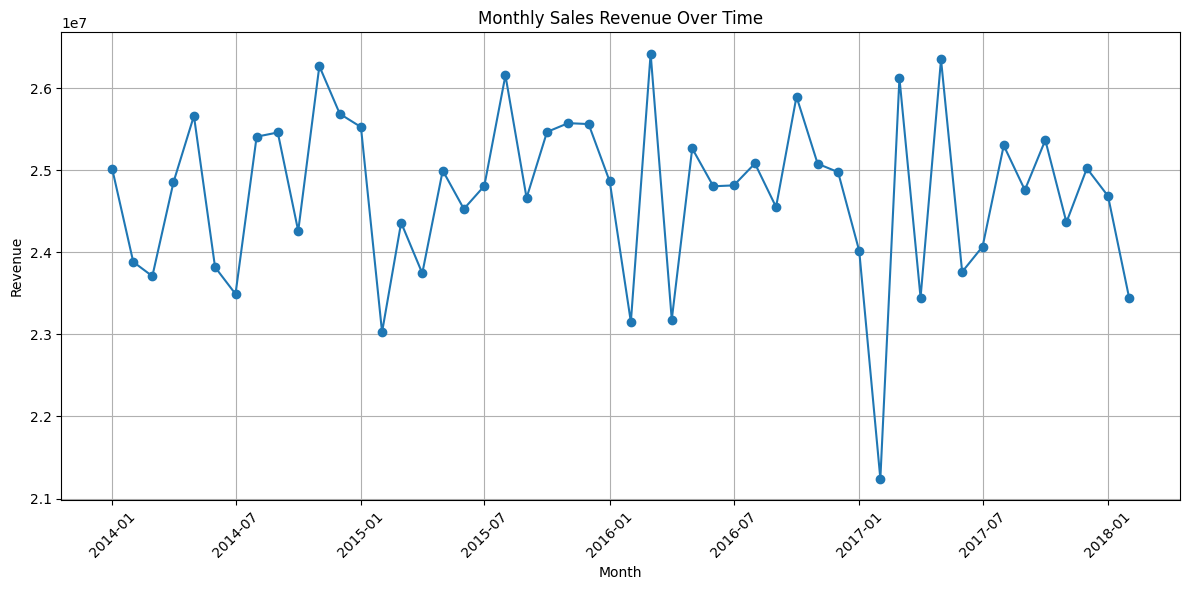

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure 'order_date' is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Step 2: Create a 'month' column (YYYY-MM format)
df['month'] = df['order_date'].dt.to_period('M').astype(str)

# Step 3: Group by 'month' and sum revenue
monthly_sales = df.groupby('month')['revenue'].sum().reset_index()

# Step 4: Sort by month in case it's not sorted
monthly_sales['month'] = pd.to_datetime(monthly_sales['month'])
monthly_sales = monthly_sales.sort_values('month')

# Step 5: Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['revenue'], marker='o', linestyle='-')
plt.title('Monthly Sales Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#assuming df is your dataframe
#convert ordeR_date to datetime(if not already)
df['order_date']=pd.to_datetime(df['order_date'])
#remove records from january and feb 2018
df_new=df[~((df['order_date'].dt.year==2018)&(df['order_date'].dt.month.isin([1,2])))]



/tmp/ipython-input-73-727663420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_month_name']=df['order_date'].dt.month_name()
/tmp/ipython-input-73-727663420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_month_name']=df_new['order_date'].dt.month


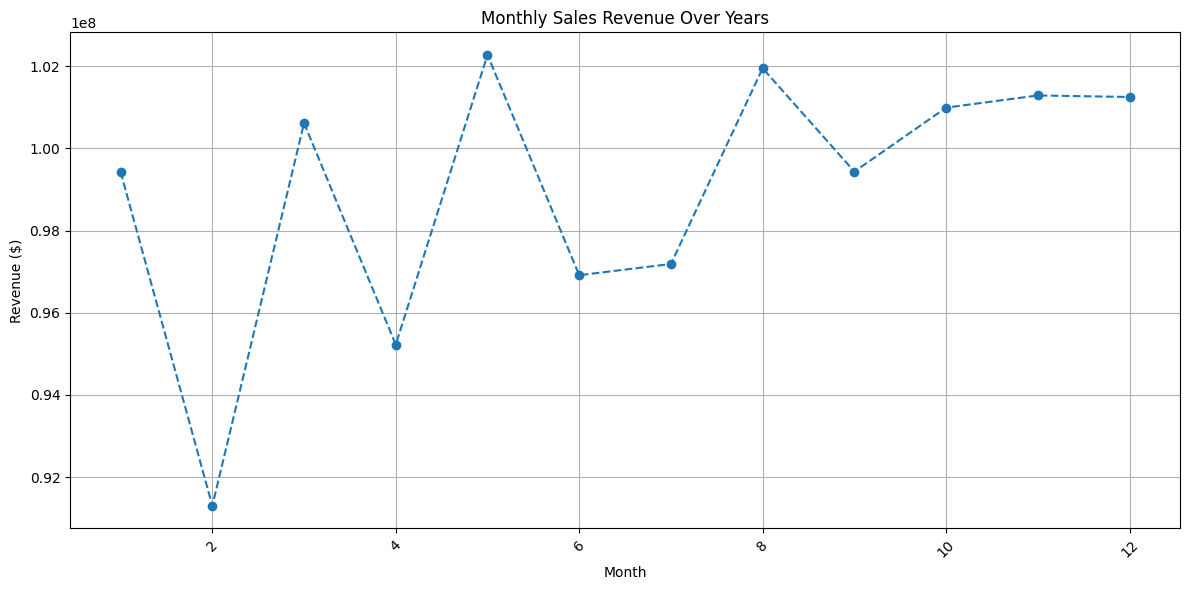

In [ ]:
df_new['order_month_name']=df['order_date'].dt.month_name()
df_new['order_month_name']=df_new['order_date'].dt.month
monthly_sales=df_new.groupby('order_month_name')['revenue'].sum().sort_index()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values,marker='o',linestyle='--')
plt.title('Monthly Sales Revenue Over Years')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-79-65817918.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product_name', y='revenue',palette='tab10')


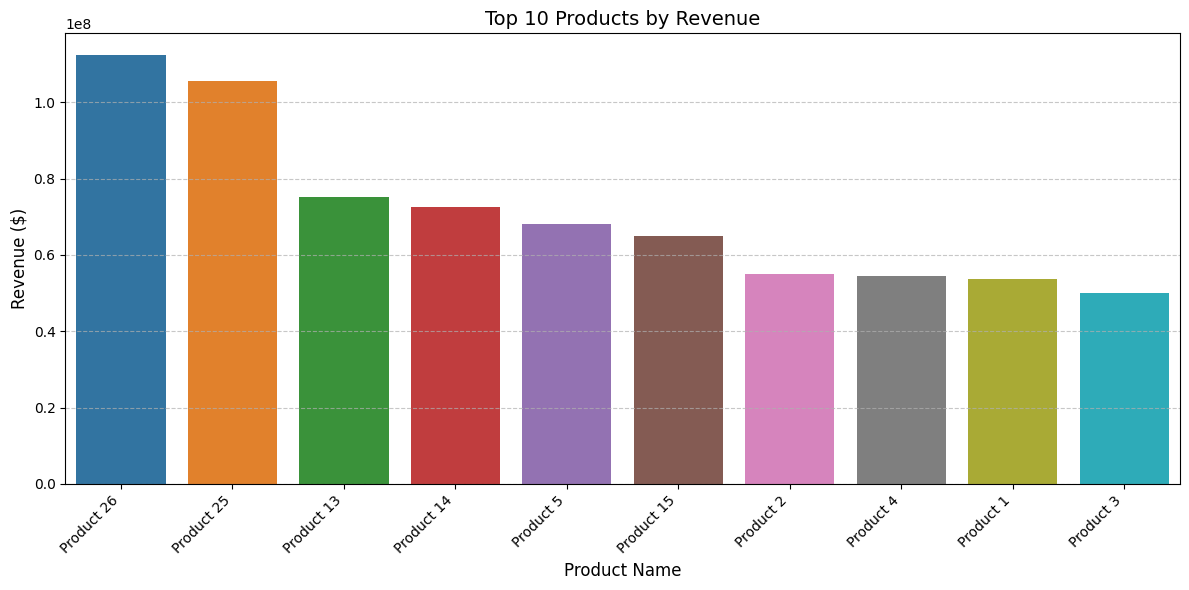

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product_name and sum the revenue, then get top 10
top_products = df_new.groupby('product_name')['revenue'].sum().nlargest(10).reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='product_name', y='revenue',palette='tab10')

# Customize the plot
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

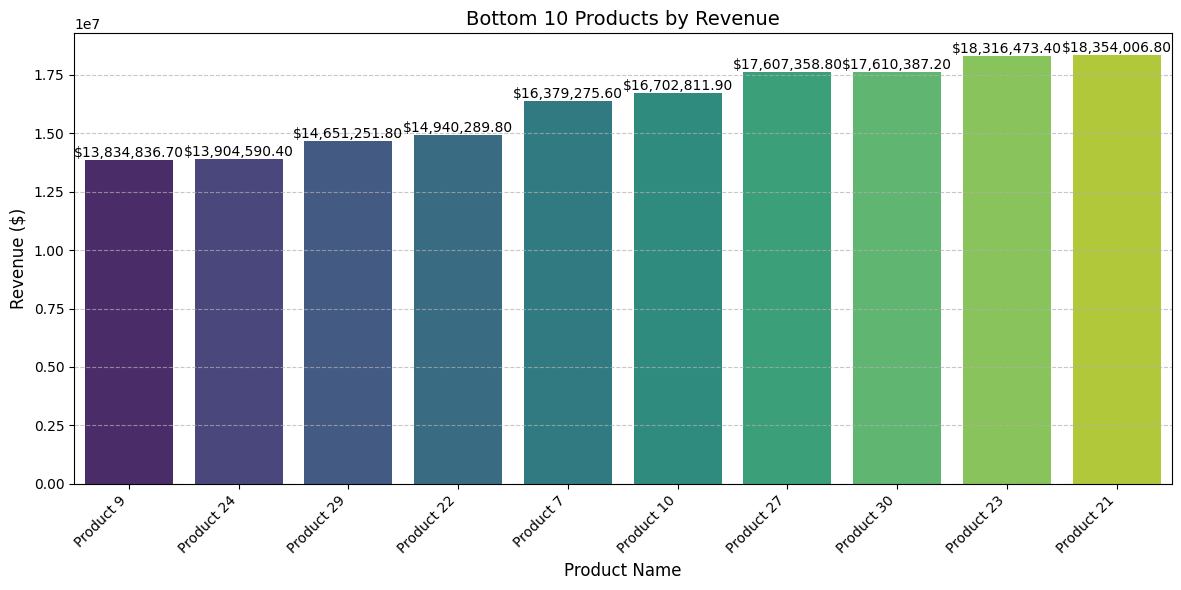

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product_name and sum the revenue, then get bottom 10
bottom_products = df_new.groupby('product_name')['revenue'].sum().nsmallest(10).reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_products, x='product_name', y='revenue', hue='product_name', palette='viridis', legend=False)

# Customize the plot
plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for index, row in bottom_products.iterrows():
    plt.text(index, row['revenue'], f'${row["revenue"]:,.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Display the plot
plt.show()

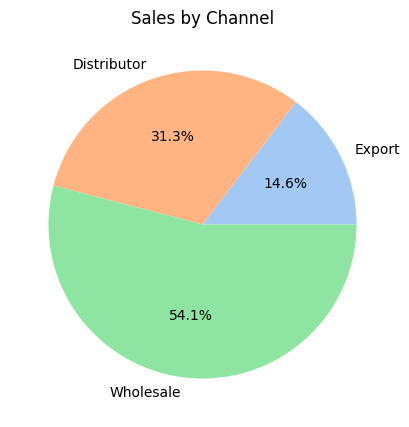

In [ ]:
#sales by channel
chan_sales=df.groupby('channel')['revenue'].sum().sort_values(ascending=True)
plt.figure(figsize=(5,5))
plt.pie(chan_sales.values,labels=chan_sales.index,autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Sales by Channel')
plt.show()

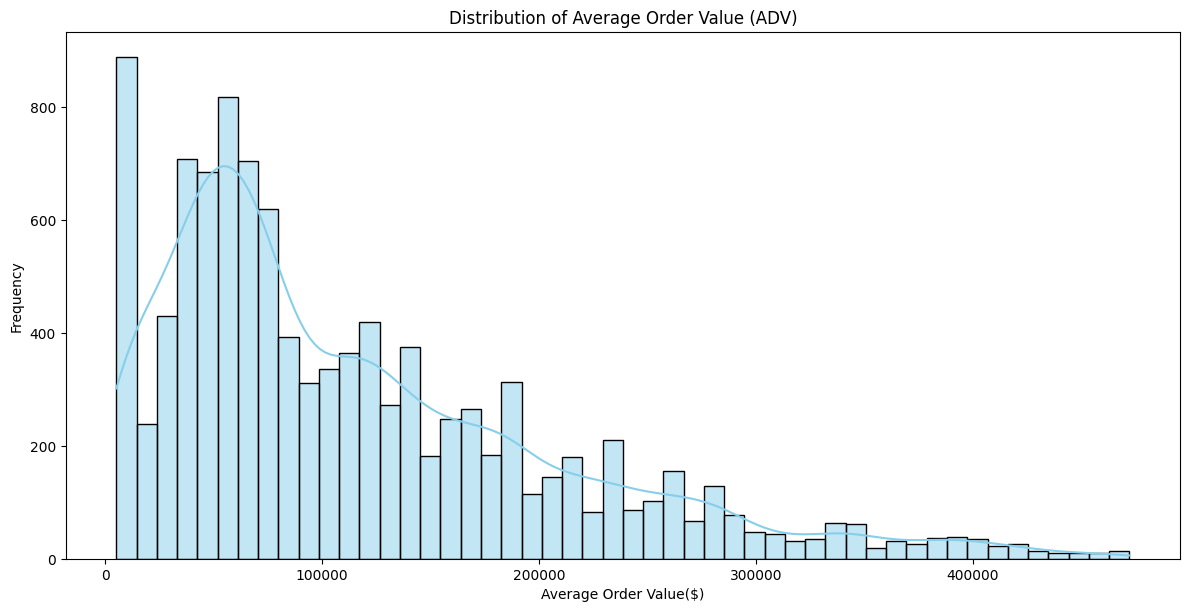

In [ ]:
#average order avlue (ADV) Distribution
aov=df.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(12,6))
sns.histplot(aov,bins=50,kde=True,color='skyblue')
plt.tight_layout()
plt.title('Distribution of Average Order Value (ADV)')
plt.xlabel('Average Order Value($)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#Unit Price Distribution per Product
#Top 10 States by revenue and order count
#Average Profit Margin by Channel
#Top and Bottom 10 Customers by Revenue
#Customer Segmentation:Revenue vs Profit Marign
#correlation Heatmap

/tmp/ipython-input-105-95145542.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='product_name', y='unit_price', palette='Set2')


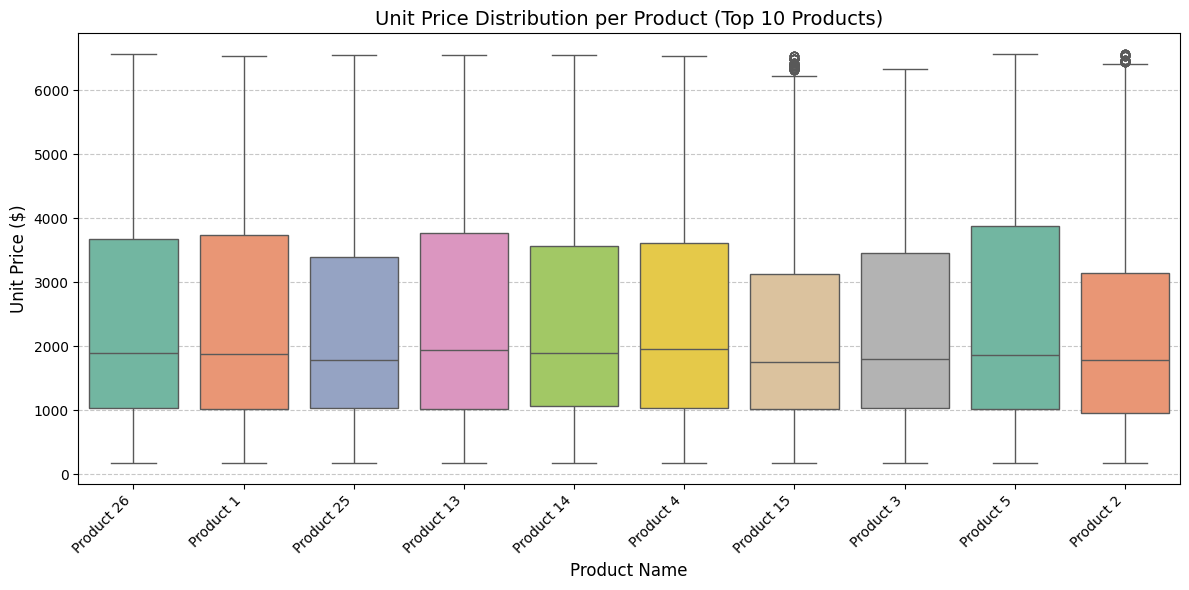

In [ ]:
#Unit Price Distribution per Product
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 products by frequency to keep the plot readable
top_products = df['product_name'].value_counts().nlargest(10).index
filtered_df = df[df['product_name'].isin(top_products)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='product_name', y='unit_price', palette='Set2')

# Customize the plot
plt.title('Unit Price Distribution per Product (Top 10 Products)', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Unit Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipython-input-107-3450496893.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_states['state_name'], rotation=45, ha='right')


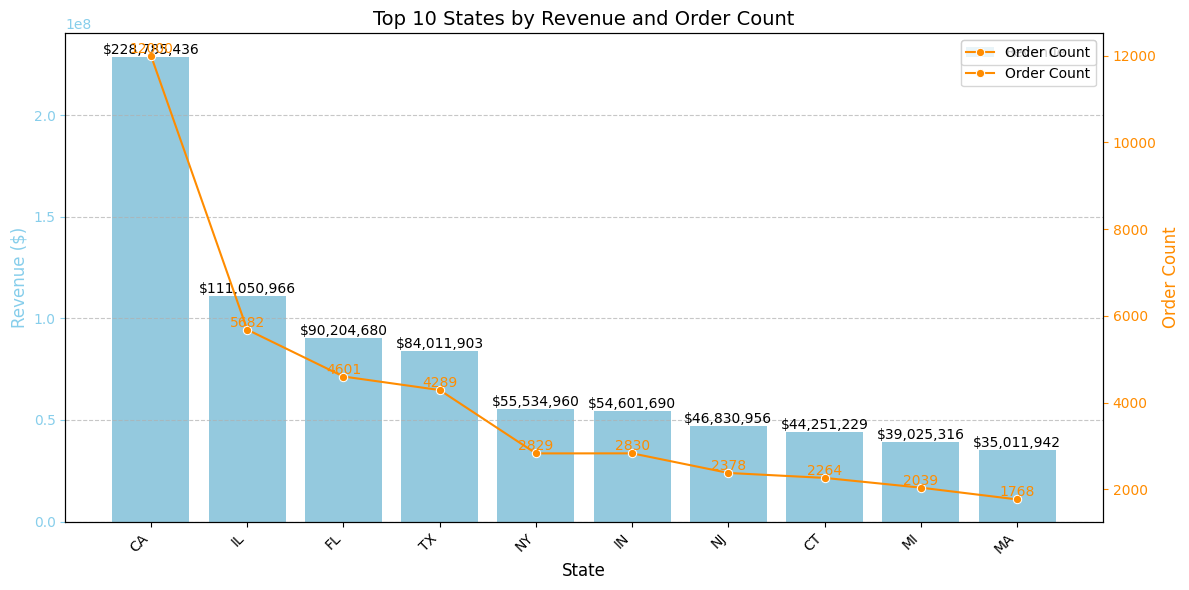

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by state_name to calculate total revenue and order count
state_stats = df.groupby('state_name').agg({
    'revenue': 'sum',
    'order_number': 'count'
}).reset_index().rename(columns={'order_number': 'order_count'})

# Get top 10 states by revenue
top_states = state_stats.nlargest(10, 'revenue')

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for revenue
sns.barplot(data=top_states, x='state_name', y='revenue', ax=ax1, color='skyblue', label='Revenue')

# Create second y-axis for order count
ax2 = ax1.twinx()
sns.lineplot(data=top_states, x='state_name', y='order_count', ax=ax2, color='darkorange', marker='o', label='Order Count')

# Customize the plot
ax1.set_title('Top 10 States by Revenue and Order Count', fontsize=14)
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Revenue ($)', fontsize=12, color='skyblue')
ax2.set_ylabel('Order Count', fontsize=12, color='darkorange')
ax1.tick_params(axis='y', colors='skyblue')
ax2.tick_params(axis='y', colors='darkorange')
ax1.set_xticklabels(top_states['state_name'], rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels for revenue bars
for i, v in enumerate(top_states['revenue']):
    ax1.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontsize=10)

# Add value labels for order count points
for i, v in enumerate(top_states['order_count']):
    ax2.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=10, color='darkorange')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipython-input-109-540730667.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_stats, x='channel', y='profit_margin_pct', palette='pastel')


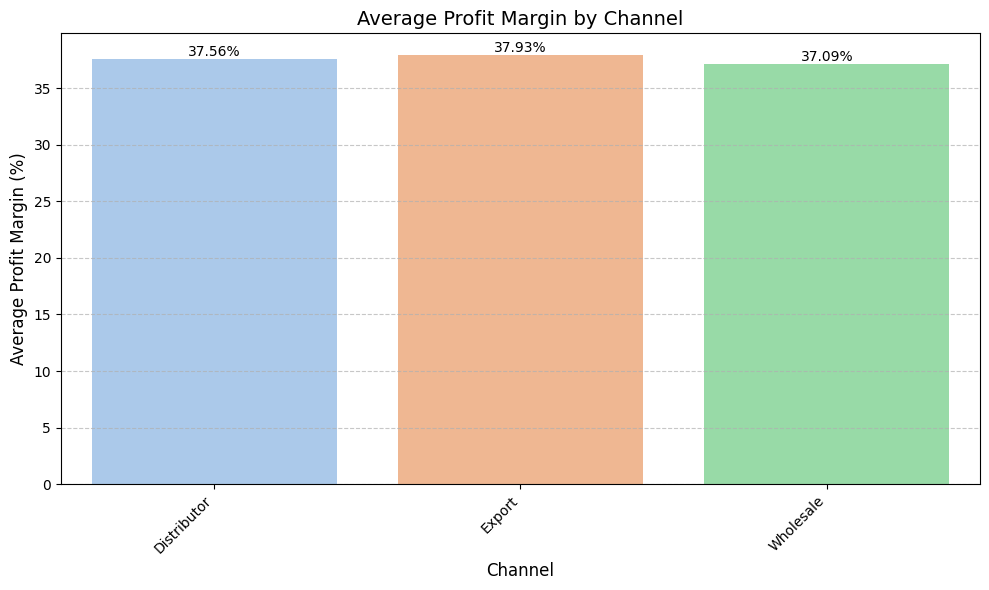

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by channel and calculate average profit margin
channel_stats = df.groupby('channel')['profit_margin_pct'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_stats, x='channel', y='profit_margin_pct', palette='pastel')

# Customize the plot
plt.title('Average Profit Margin by Channel', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for index, row in channel_stats.iterrows():
    plt.text(index, row['profit_margin_pct'], f'{row["profit_margin_pct"]:.2f}%',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipython-input-112-3912118956.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-112-3912118956.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


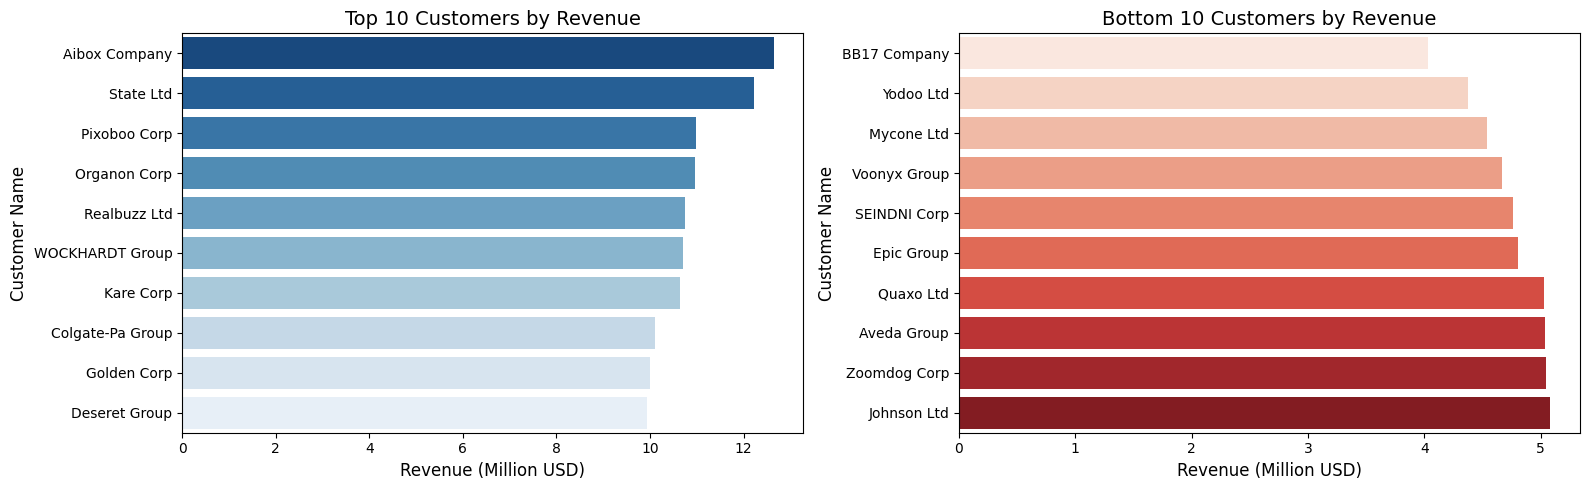

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

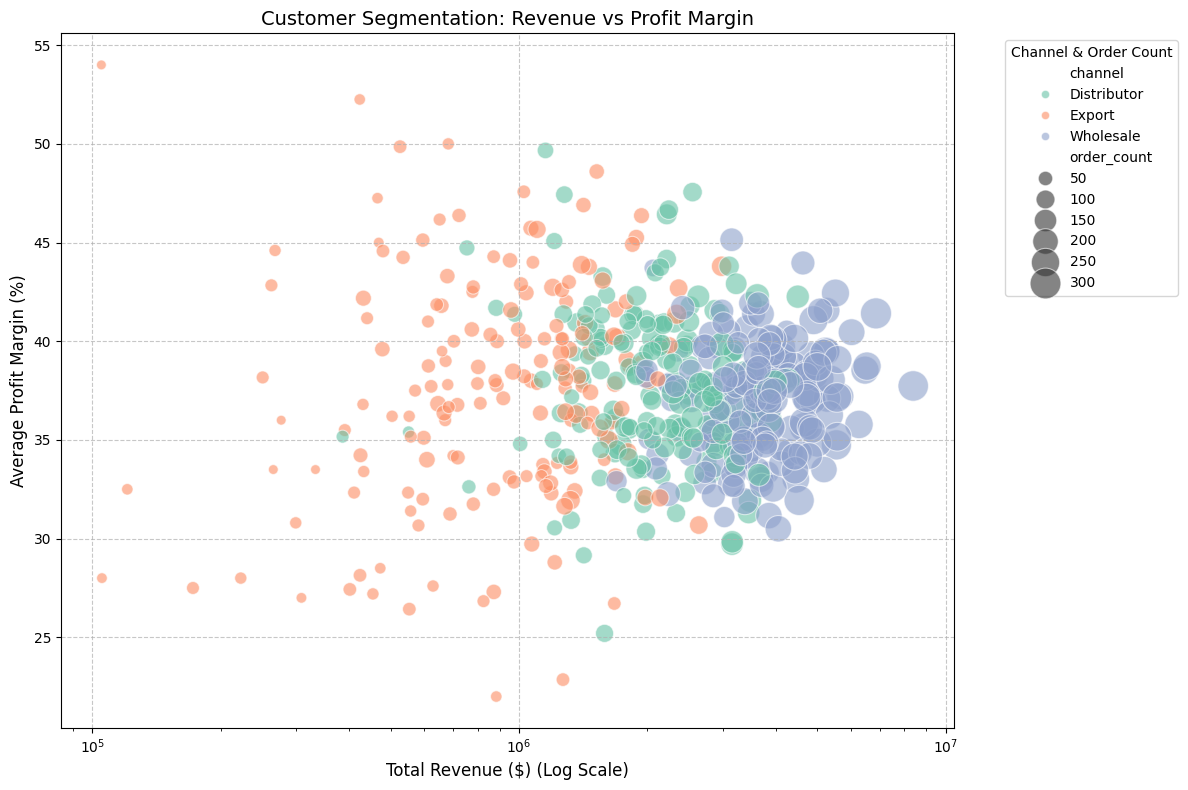

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by customer_name and channel to calculate total revenue, average profit margin, and order count
customer_stats = df.groupby(['customer_name', 'channel']).agg({
    'revenue': 'sum',
    'profit_margin_pct': 'mean',
    'order_number': 'count'
}).reset_index().rename(columns={'order_number': 'order_count'})

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=customer_stats,
    x='revenue',
    y='profit_margin_pct',
    hue='channel',
    size='order_count',
    sizes=(50, 500),  # Range of marker sizes based on order count
    alpha=0.6,  # Transparency to handle overlapping points
    palette='Set2'
)

# Customize the plot
plt.title('Customer Segmentation: Revenue vs Profit Margin', fontsize=14)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Channel & Order Count')

# Add log scale for revenue if the range is wide
plt.xscale('log')
plt.xlabel('Total Revenue ($) (Log Scale)', fontsize=12)

plt.tight_layout()

# Display the plot
plt.show()

## 🔹 15. *Correlation Heatmap of Numeric Features*

Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns


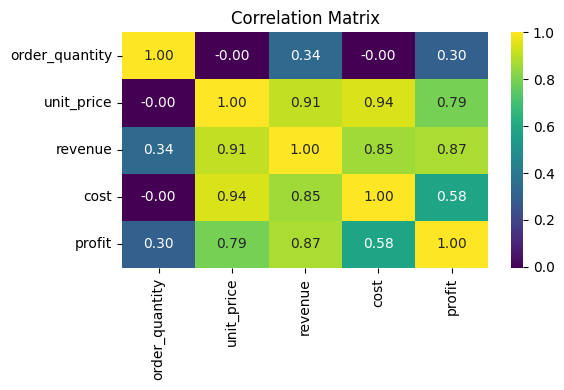

In [ ]:

# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

In [ ]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)